In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the processed data.
df = pd.read_csv('processed_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,Sex_Male,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),PhysicalActivities_Yes,...,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes
0,-0.48774,0.113974,-0.025174,-0.061718,1.404549,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.48774,-0.508455,0.674879,1.619866,0.760563,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.48774,-0.508455,-0.725227,-0.528825,0.116577,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.48774,-0.508455,0.674879,0.872496,-0.097769,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.48774,-0.508455,-0.025174,0.685653,1.189729,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [3]:
# Check value counts of HadHeartAttack_Yes.
df.value_counts('HadHeartAttack_Yes')

HadHeartAttack_Yes
0    23673
1     1327
dtype: int64

In [4]:
# Assign HadHeartAttack_Yes as target variable.
y = df.HadHeartAttack_Yes.values
X = df.drop(columns="HadHeartAttack_Yes").values

# Split training/test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


# Model with no hidden layers, 8 input units, 50 epochs.

In [5]:
# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim=num_inputs))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
586/586 [==============================] - 1s 1ms/step - loss: 0.2064 - accuracy: 0.9469
Epoch 2/50
586/586 [==============================] - 1s 877us/step - loss: 0.1583 - accuracy: 0.9484
Epoch 3/50
586/586 [==============================] - 1s 968us/step - loss: 0.1491 - accuracy: 0.9491
Epoch 4/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1465 - accuracy: 0.9487
Epoch 5/50
586/586 [==============================] - 1s 884us/step - loss: 0.1454 - accuracy: 0.9497
Epoch 6/50
586/586 [==============================] - 1s 898us/step - loss: 0.1448 - accuracy: 0.9505
Epoch 7/50
586/586 [==============================] - 1s 882us/step - loss: 0.1441 - accuracy: 0.9505
Epoch 8/50
586/586 [==============================] - 1s 863us/step - loss: 0.1435 - accuracy: 0.9516
Epoch 9/50
586/586 [==============================] - 1s 892us/step - loss: 0.1427 - accuracy: 0.9521
Epoch 10/50
586/586 [==============================] - 1s 921us/step - loss: 0.1427 - 

# Model with 2 hidden layers, 50 epochs.

In [6]:
# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=num_inputs))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Second hidden layer.
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1979 - accuracy: 0.9444
Epoch 2/50
586/586 [==============================] - 1s 2ms/step - loss: 0.1476 - accuracy: 0.9502
Epoch 3/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1450 - accuracy: 0.9499
Epoch 4/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1438 - accuracy: 0.9512
Epoch 5/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1421 - accuracy: 0.9520
Epoch 6/50
586/586 [==============================] - 1s 2ms/step - loss: 0.1412 - accuracy: 0.9519
Epoch 7/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1401 - accuracy: 0.9526
Epoch 8/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1398 - accuracy: 0.9530
Epoch 9/50
586/586 [==============================] - 1s 1ms/step - loss: 0.1389 - accuracy: 0.9531
Epoch 10/50
586/586 [==============================] - 1s 2ms/step - loss: 0.1383 - accuracy: 0.9532

Accuracy: 94.58%

# Evaluating the model.

In [7]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()
# plt.hist(predictions_list)

196/196 [==============================] - 0s 751us/step


In [8]:
# Create the evaluation dataframe.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df

,Has Heart Disease,Model Prediction
18,1,0.095866
22,1,0.638620
43,1,0.546792
88,1,0.153711
94,1,0.005660
...,...,...
6177,1,0.093681
6196,1,0.675683
6221,1,0.600731
6227,1,0.092271


<Axes: >

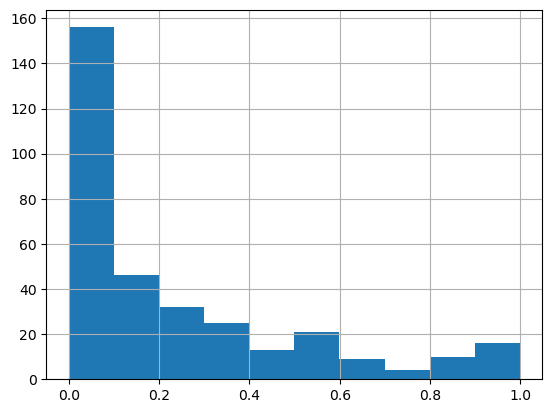

In [10]:
positive_df['Model Prediction'].hist()

# Using 100,000 data values.

In [11]:
# Import the processed data.
df = pd.read_csv('processed_data_100k.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,Sex_Male,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),PhysicalActivities_Yes,...,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes
0,-0.488652,0.103781,-0.014655,-0.054821,1.397738,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.488652,-0.515270,0.683217,1.634413,0.757997,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.488652,-0.515270,-0.712528,-0.524053,0.118256,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.488652,-0.515270,0.683217,0.883642,-0.094678,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.488652,-0.515270,-0.014655,0.695949,1.184334,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Neural network on new dataset with 2 hidden layers, 100 epochs.

In [12]:
# Assign HadHeartAttack_Yes as target variable.
y = df.HadHeartAttack_Yes.values
X = df.drop(columns="HadHeartAttack_Yes").values

# Split training/test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create neural network structure.
nn = tf.keras.models.Sequential()

num_inputs = len(X_train[0])

# Input layer.
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=num_inputs))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Second hidden layer.
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
2344/2344 [==============================] - 5s 1ms/step - loss: 0.1647 - accuracy: 0.9465
Epoch 2/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1490 - accuracy: 0.9486
Epoch 3/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1478 - accuracy: 0.9482
Epoch 4/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1471 - accuracy: 0.9487
Epoch 5/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1465 - accuracy: 0.9489
Epoch 6/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9493
Epoch 7/100
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9491
Epoch 8/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1451 - accuracy: 0.9493
Epoch 9/100
2344/2344 [==============================] - 6s 2ms/step - loss: 0.1450 - accuracy: 0.9492
Epoch 10/100
2344/2344 [==============================] - 5s 2ms/step - l

In [14]:
# Make predictions.
predictions = nn.predict(X_test)
predictions_list = predictions.flatten().tolist()

# Create the evaluation dataframe.
evaluation_df = pd.DataFrame({'Has Heart Disease': y_test, 'Model Prediction': predictions_list})
positive_df = evaluation_df[evaluation_df['Has Heart Disease'] == 1]
positive_df.head(20)

782/782 [==============================] - 1s 1ms/step


,Has Heart Disease,Model Prediction
10,1,0.446037
24,1,0.364393
27,1,0.430772
52,1,0.239792
99,1,0.675030
132,1,0.041439
153,1,0.093917
157,1,0.369567
188,1,0.694323
190,1,0.005336


<Axes: >

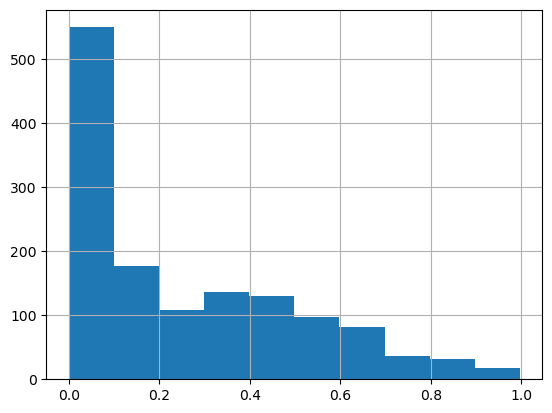

In [15]:
positive_df['Model Prediction'].hist()